In [2]:
import numpy as np
import pandas as pd
import os
import stringdist
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('/home/prateeksha/Downloads/Deduplication Problem - Sample Dataset.csv')

In [4]:
data.head()

,ln,dob,gn,fn
0,SMITH JR,01/03/68,F,WILLIAM
1,ROTHMEYER JR,01/03/68,F,WILLIAM
2,ASBY JR,01/03/68,F,WILLIAM
3,SALTER JR,01/03/68,F,WILLIAM
4,SALTER JR,01/03/68,F,WILLIAM


In [5]:
dummy = data.copy()

dummy= dummy.shift(1)
dummy.iloc[0]= dummy.iloc[len(data)-1]
temp_data = pd.concat([data, dummy], axis=1)
#print (temp_data)
    
for i in range(1, len(data)):
    
    dummy= dummy.shift(1)
    dummy.iloc[0]= dummy.iloc[len(data)-1]
    temp_da = pd.concat([data, dummy], axis=1)
    #print (temp_da)
    temp_data= pd.concat([temp_data, temp_da], axis=0)
    
temp_data.columns= ['ln', 'dob', 'gn', 'fn', 'LN', 'DOB', 'GN1', 'FN1']
temp_data = temp_data.reset_index()

In [6]:
len(temp_data)

10609

In [7]:
stringdist.levenshtein('SALTER JR', 'ASBY JR')

5

In [8]:
temp_data['dob'] = pd.to_datetime(temp_data.dob)
temp_data['DOB'] = pd.to_datetime(temp_data.DOB)

In [9]:
f1=[]
f2=[]
f3=[]
f4=[]
for i in range(len(temp_data)):
        f1.append(stringdist.levenshtein(temp_data.ln[i],temp_data.LN[i]))
        f3.append(stringdist.levenshtein(temp_data.gn[i],temp_data.GN1[i]))
        f4.append(stringdist.levenshtein(temp_data.fn[i], temp_data.FN1[i]))
        if (temp_data['dob'][i]==temp_data['DOB'][i]):
            f2.append(0)
        else: f2.append(1)
        
        

In [10]:
df = pd.DataFrame({'f1':f1, 'f2':f2, 'f3':f3, 'f4':f4})

In [11]:
new_data = pd.concat([temp_data, df], axis =1)

In [12]:
new_data.head()

,index,ln,dob,gn,fn,LN,DOB,GN1,FN1,f1,f2,f3,f4
0,0,SMITH JR,1968-01-03,F,WILLIAM,FUNARO J,2037-06-12,F,HARRIET,7,1,0,6
1,1,ROTHMEYER JR,1968-01-03,F,WILLIAM,SMITH JR,1968-01-03,F,WILLIAM,8,0,0,0
2,2,ASBY JR,1968-01-03,F,WILLIAM,ROTHMEYER JR,1968-01-03,F,WILLIAM,8,0,0,0
3,3,SALTER JR,1968-01-03,F,WILLIAM,ASBY JR,1968-01-03,F,WILLIAM,5,0,0,0
4,4,SALTER JR,1968-01-03,F,WILLIAM,SALTER JR,1968-01-03,F,WILLIAM,0,0,0,0


In [13]:
from sklearn.cluster import KMeans

In [14]:
k_means = KMeans(n_clusters =2)
k_means.fit(new_data[['f1','f2','f3','f4']])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [15]:
r = k_means.predict(new_data[['f1','f2','f3','f4']])

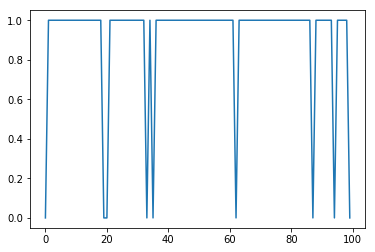

In [16]:
plt.plot(r[:100])
plt.show()

In [17]:
from sklearn.mixture import GaussianMixture

In [18]:
gmm = GaussianMixture(n_components =2)
gmm.fit(new_data[['f1','f2','f3','f4']])

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=2, n_init=1, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

In [19]:
s= gmm.predict(new_data[['f1','f2','f3','f4']])

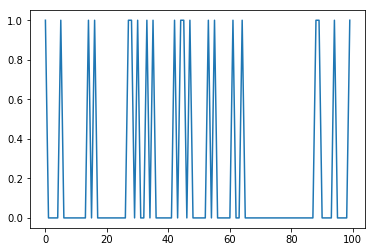

In [20]:
plt.plot(s[:100])
plt.show()

In [21]:
r1 = (r+s)/2

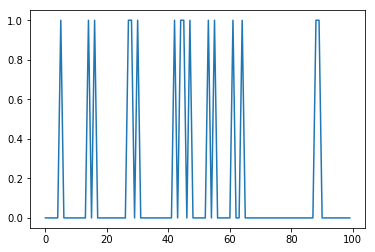

In [22]:
plt.plot(r1[:100])
plt.show()

In [23]:
data['dob'] = pd.to_datetime(data.dob)


# building the dataframe without common names

In [24]:
y= pd.DataFrame()

for i in range(len(data)):
    s=0
    for j in range(i+1, len(data)):
        

        F1= stringdist.levenshtein(data.ln[i],data.ln[j])
        F3= stringdist.levenshtein(data.gn[i],data.gn[j])
        F4 = stringdist.levenshtein(data.fn[i], data.fn[j])
        if (data['dob'][i]==data['dob'][j]):
            F2=0    
        else: F2 = 1
        x=pd.DataFrame([F1,F2,F3,F4]).T
        r= gmm.predict(x)
        s= s+r
    if (s==1):
        y=pd.concat([y,pd.DataFrame(data.iloc[i]).T])

In [25]:
len(y)

0

In [66]:
y.to_csv('result.csv')